# XXI. KRUSKAL'S MINIMUM SPANNING TREE ALGORITHM
We have already covered Prim's MST algorithm and a blazingly fast implementation of it. There are several reasons for studying a second greedy MST algorithm, due to Kruskal. 
- First, it's a beautiful algorithm, worthy of a greatest hits compilation. 
- Second, to obtain a super-fast implementation of it, we'll need to learn about the simple but fundamental "Union-Find" data structure. 
- The third reason is, is there's some very cool connections between Kruskal's algorithm and certain types of clustering algorithms. I'll discuss how natural greedy algorithms in a clustering context are best understood as a variance of Kruskal's minimum spanning tree algorithm. 

#### KRUSKAL'S ALGORITHM
We want to get away with a single scan through the edges in short order. So, obviously in the preprocessing step, we want to take the unsorted array of edges and sort them by edge cost. To keep the notation and the pseudocode simple, let me just, for the purposes of the algorithm, description only, rename the edges 1, 2, 3, 4, all the way up to m conforming to this sorted order, right? So, the algorithm's just going to scan through the edges in this newly found sorted order. So we're going to call the tree in progress capital T, like we did in Prim's algorithm. And now, we're just going to zip through the edges once in sorted order. And we take an edge, unless it'sobviously a bad idea. And here a bad idea means it creates a cycle, that's a no-no, but as long as there's no cycle, we go ahead and include the edge. And that's it, after you finish up the for loop you just return the tree capital T. It's easy to imagine various optimizations that you could do. So for example, once you've added enough edges to have a spanning tree. So n - 1 edges, where n is the number of vertices, you can get ahead, go ahead and abort this for loop and terminate the algorithm. But let's just keep things simple and analyze this three line version of Kruskal's algorithm in this lecture.



In [124]:
class union_find:
    # Below datastructure has Union-Find implementation with
    # ☻ Lazy Unions
    # ☻ Union-by-Rank
    # ☻ Path Compression 
    def __init__(self, array):
        #self.uf = list(set(array))
        self.uf = array
        self.n = len(self.uf)
        self.parent = [_ for _ in range(self.n)]
        self.size = [1 for _ in range(self.n)]
        self.rank = [0 for _ in range(self.n)]
    
    def __repr__(self):
        #return str([[self.uf[i], self.parent[i], self.rank[i], self.size[i]] for i in range(self.n)])
        return str(self.uf)
    
    def __getitem__(self, index):
        if self.n <= index:
            return None
        else:
            return self.uf[index]
    
    def __setitem__(self, index, value):
        self.uf[index] = value
    
    def find(self, x, start_parent_idx = None): # find parent of x
        parent_idx = self.parent[self.uf.index(x)]
        if start_parent_idx == None:
            start_parent_idx = parent_idx
        if x != self.uf[parent_idx]:
            pidx = self.find(self.uf[parent_idx], start_parent_idx)
            self.parent[parent_idx] = pidx
            if start_parent_idx == parent_idx:
                self.parent[self.uf.index(x)] = pidx
                return pidx
            else:
                return pidx
        else: 
            return parent_idx
        
    
    def union(self, ci, cj):  # any 2 element from original input array
        ci_pidx = self.find(ci)
        cj_pidx = self.find(cj)
        if ci_pidx != cj_pidx: # checking whether or not this new edge is going to create a cycle using representative parent
            if self.rank[ci_pidx] > self.rank[cj_pidx]:
                self.parent[cj_pidx] = ci_pidx
                self.size[ci_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
            elif self.rank[ci_pidx] < self.rank[cj_pidx]:
                self.parent[ci_pidx] = cj_pidx
                self.size[cj_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
            else:
                if self.size[ci_pidx] >= self.size[cj_pidx]:
                    self.parent[cj_pidx] = ci_pidx
                    self.size[ci_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
                    self.rank[ci_pidx] += 1
                else:
                    self.parent[ci_pidx] = cj_pidx
                    self.size[cj_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
                    self.rank[cj_pidx] += 1

['i', 'e', 'h', 'd', 't', 'g', 'a', 'c', 's', 'f', 'b']
Printing mst edges: [['a', 'f', 1], ['b', 'f', 1], ['b', 'g', 1], ['f', 'h', 1], ['i', 't', 1], ['f', 't', 2], ['b', 'c', 3], ['s', 'g', 4], ['s', 'd', 8], ['d', 'e', 9]]
Overall cost of a minimum spanning tree: 31


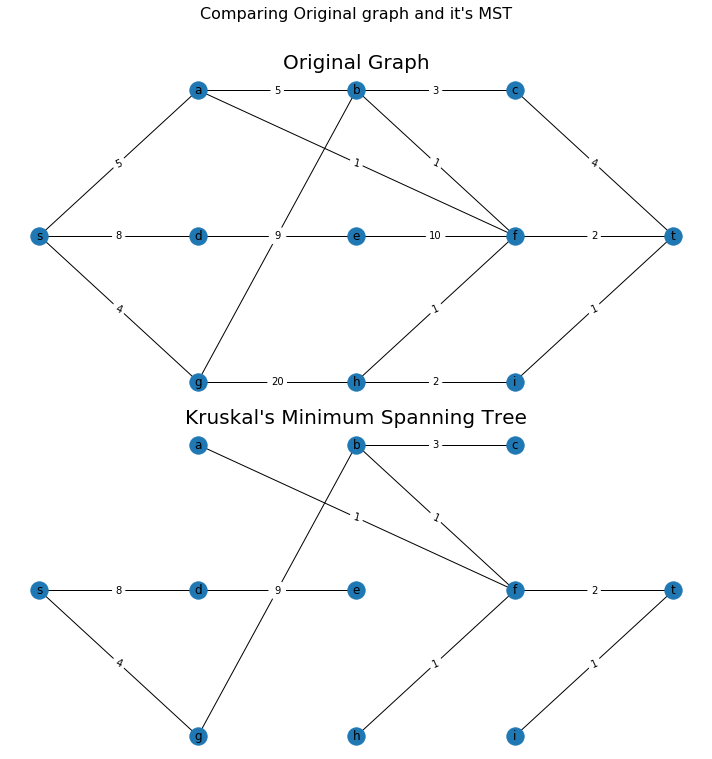

In [133]:
%matplotlib inline
import networkx as nx
import heapq
import numpy as np
from matplotlib import pyplot as plt


    
    
def kruskals_mst_undirected_unionfind(DG, source):
    mst_edges = []
    overall_cost_mst = 0
    sorted_edges = sorted(list(map(lambda x: [x[2]['weight'], x[0], x[1]], DG.edges.data())))
    unique_nodes = []
    list(map(lambda x: unique_nodes.extend([x[1], x[2]]), sorted_edges))
    unique_nodes = list(set(unique_nodes))
    #print("graph: {}\n {}".format(DG.edges.data(), sorted_edges))
    ufk = union_find(unique_nodes)
    for weight, node1, node2 in sorted_edges:
        parent1_idx = ufk.find(node1)
        parent2_idx = ufk.find(node2)
        if parent1_idx != parent2_idx:
            ufk.union(node1, node2)
            mst_edges.append([node1, node2, weight])
            overall_cost_mst += weight
    print(ufk)
    print("Printing mst edges: {}\nOverall cost of a minimum spanning tree: {}".format(mst_edges, overall_cost_mst))
    return mst_edges
    
    
g = nx.Graph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
plt.figure(figsize=(10,10))
plt.subplot(211)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)
plt.title('Original Graph', size=20)



start_vert = 's'
mst_edges = kruskals_mst_undirected_unionfind(g, start_vert)
mst = nx.Graph()
mst.add_weighted_edges_from(mst_edges)
weights = nx.get_edge_attributes(mst, 'weight')
plt.subplot(212) 
nx.draw_networkx_edge_labels(mst, pos, edge_labels = weights)
nx.draw(mst, pos, with_labels = True)
plt.title('Kruskal\'s Minimum Spanning Tree', size=20)


plt.suptitle('Comparing Original graph and it\'s MST', size=16).set_position([.5, 1.05])
plt.tight_layout()
plt.show()




# UNION-FIND Datastructure
Union-Find Data Structure is to maintain a partition of a set of objects. We're only going to ask it to support two operations.
- FIND($x$)  : So the find operation, we give it an object from this universe and we ask the data structure to return to us the name of the group to which that object belongs. 
- UNION($C_i$,$C_j$) : The union operation by contrast, takes as input, the names of two groups. And what we want the data structure to do is to fuse those two groups together. That is, the objects in the first group, and the objects in the second group should all coalesced, and be, now, in one sole group. 

When 2 clusters are to be coalesced, the number of leader points to be updated is bounded above by $O(n)$ as n pointer updates is required at worst to restore datastructure.


Lets summarize the running times of find and union operations in Union-Find Data Structure:


<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp;Union-Find Data Structure</caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td>Find </td>	<td>$O(1)$ <td> </tr>
    <tr> <td>Union </td>	<td>$O(n)$ <td> </tr>
</table>



In [36]:
class union_find_naive:
    
    def __init__(self, array):
        self.uf = list(set(array))
        #self.uf = array
        self.n = len(self.uf)
        self.parent = [_ for _ in range(self.n)]
    
    def __repr__(self):
        return str(self.parent)
        #pass
    
    def find(self, x): # find parent of x
        return self.parent[self.uf.index(x)]
    
    def union(self, ci, cj):  # any 2 element from original input array
        ci_pidx = self.find(ci)
        cj_pidx = self.find(cj)
        if ci_pidx != cj_pidx: # checking whether or not this new edge is going to create a cycle using representative parent
            self.parent = [ci_pidx if i == cj_pidx else i for i in self.parent]
            
ufn = union_find_naive([3, 4, 2, 7, 1, 9, 5, 0, 6, 3, 4, 8])

print(ufn)
print(ufn.find(9))
print(ufn.find(4))

for u in [[3,4], [2, 4], [5,6], [6, 4]]:  # bad performance
    ufn.union(u[0], u[1])
    print(ufn)




[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9
4
[0, 1, 2, 3, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 2, 2, 5, 6, 7, 8, 9]
[0, 1, 2, 2, 2, 5, 5, 7, 8, 9]
[0, 1, 5, 5, 5, 5, 5, 7, 8, 9]


# UNION-FIND Datastructure - using size field
So just with each group, you just keep a count of how many vertices are in that group so you maintain a size field for each group. That allows you to check in constant time what's the population of two different groups and figure out, again in constant time, which one's bigger. <br>
When 2 components merge, have smaller one inherit the leader of the larger one.<br>
Well unfortunately, this song remains the same. It still might be the case that say in the final iteration of Kruskal you're merging two components that both have size n over 2, so it doesn't matter. No matter which leader you choose you're going to be stuck updating the leader pointers of n over 2 or theta of n vertices.

<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp;Union-Find using size field</caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td>Find </td>	<td>$O(1)$ <td> </tr>
    <tr> <td>Union </td>	<td>$O(n)$ <td> </tr>
</table>

Rather than asking how many updates might a merging of two components trigger, let's adopt a vertex-centric view. Let's suppose you're one of the vertices of this graph, so initially the beginning of Kruskal's algorithm you're in your own isolated connected component, you just point to yourself. You're your own leader. And then as Kruskal's algorithm runs it's course, your leader pointer will periodically get updated. At some point you're no longer pointing to yourself. You're pointing to some other vertex. Then at some point you're pointer gets updated again, you're pointing to yet some other vertex and so on. How many times over the entire trajectory of Kruskal's algorithm, in light of our new optimization, might you as some vertex of this graph have your leader pointer updated?

The answer is $O(log(n))$

What is the reason for this? Well, suppose you're a vertex and you're in some group and it has maybe 20 vertices, so you're 1 of 20. Now, suppose at some point your leader pointer gets updated. Why did that happen? Well, it meant that your group of 20 vertices merged with some other group that has to be bigger. Remember, your leader pointer only gets rewired in a fusion if you were in the smaller group. So you're joining a group at least as big as yours. So the size of the union, the size of your new community, your new connected component is at least double the size of your previous one. So the bottom line is every time you as a vertex has your leader pointer updated, the population in the component to which you belong is at least twice as large as before. Now, you started the connecting component of size one. The connecting component is not going to have more than n vertices. So the number of doublings you might have to endure at most log base 2 of n. So that bounds how many leader pointers you will see as a vertex in this graph.

<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp;Union-Find using size field</caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td>Find </td>	<td>$O(1)$ <td> </tr>
    <tr> <td>Union: pointer updates in just one iteration</td>	<td>$O(n)$ <td> </tr>
    <tr> <td>Union: Time for overall leader pointer updates in Kruskal's </td>	<td>$O(n log(n))$ <td> </tr>
</table>

So even though we might do a linear amount of pointer updates in just one iteration of this for loop, we still have this global upper bound of n log n on the total number of leader pointer updates. 

In [45]:
class union_find_size:
    
    def __init__(self, array):
        self.uf = list(set(array))
        #self.uf = array
        self.n = len(self.uf)
        self.parent = [_ for _ in range(self.n)]
        self.size = [1 for _ in range(self.n)]
    
    def __repr__(self):
        return str(self.parent)
        #pass
    
    def find(self, x): # find parent of x
        return self.parent[self.uf.index(x)]
    
    def union(self, ci, cj):  # any 2 element from original input array
        ci_pidx = self.find(ci)
        cj_pidx = self.find(cj)
        if ci_pidx != cj_pidx: # checking whether or not this new edge is going to create a cycle using representative parent
            if self.size[ci_pidx] >= self.size[cj_pidx]:
                self.parent = [ci_pidx if i == cj_pidx else i for i in self.parent]
                self.size[ci_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
            else:
                self.parent = [cj_pidx if i == ci_pidx else i for i in self.parent]
                self.size[cj_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
            
ufs = union_find_size([3, 4, 2, 7, 1, 9, 5, 0, 6, 3, 4, 8])

print(ufs)
print(ufs.find(9))
print(ufs.find(4))

for u in  [[3,4], [2, 4], [5,6], [6, 4]]:
    ufs.union(u[0], u[1])
    print(ufs)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9
4
[0, 1, 2, 3, 3, 5, 6, 7, 8, 9]
[0, 1, 3, 3, 3, 5, 6, 7, 8, 9]
[0, 1, 3, 3, 3, 5, 5, 7, 8, 9]
[0, 1, 3, 3, 3, 3, 3, 7, 8, 9]


# XXII. CLUSTERING


# XXIII. ADVANCED UNION-FIND
The raison d'etre of a union-find data structure is to maintain a partition of a universe of objects. So in the context of Kruskal's algorithm, the objects were the vertices, and the groups we wanted to maintain were the connected components with respect to the edges we committed ourselves to so far.

Now the part which is cool and obvious about this approach is our find operations take constant time. All you do is return the leader of the given object. Now the tricky part was analyzing the cost of Union operations. So the problem here is that to maintain the invariant that every object of a group points to its leader. When you fuse two groups, you have to update a bunch of the objects' leaders. We'd only have one leader for the one new group.

The simple, but totally crucial, optimization that we discussed was when two groups merge you update the leader pointers of all objects in the smaller group to point to the leader of the bigger group. That is the new fused group inherits the leader from the bigger of its constituent parts. If we do that optimization, it's still the case that a single union might take linear time fade event time but a sequence of n unions takes only big o of n log in time. And that's because each object endures at most a logarithmic number of leader updates, cause every time it's leader pointer gets updated the population of the group that it inhabits doubles.

***
## Lazy Unions

So now we are going to discuss a different approach to implementing the union find data structure i.e. Lazy Unions.

And so the new idea is very simple let's just re-wire one pointer i.e. parent pointer $C_j$ to point to another parent pointer $C_i$ and then it's understood that  descendants of  $C_j$ also now have the  $C_i$ as well.<br>
So as a result, we do again get a directed tree afterwards, but we don't get one with just depth of one. We don't get as shallow, bushy tree. We get a deeper one that has two or more levels below the root.

So, let me give you another way of thinking about this in terms of an array representation. And here I also want to make a point that why conceptually it's going to be very useful to think of these union find data structure in terms of these directed trees. You're actually implementing this data structure this is not how you'd do it. You wouldn't bother with actually pointers between the different objects. You'd just have a simply array indexed by the nodes. And in the entry corresponding to a node i you would just store the name of i's parent. 

UNION($C_i$,$C_j$) : <br>
Well, in general, you're given two objects, each belongs to some group. You can think of these two groups conceptually as directed trees. If you follow all the parent corners, all parent corners lead to the root vertex. We identify those root vertices with the leaders of these two groups. Now when you have to merge the two trees together, how do you do it? Well, you pick one of the groups and you look at its roots currently it points to itself. You can change its parent pointer to point to the other groups leader. That is you install one of the two roots as a new child of the other trees root.

Running time:<br>
So I hope the pros and cons of this alternative approach to the union find data structure are intuitively clear. The win, the pro, comes in the union operation, which is now very simple. Now you might be tempted to just say union takes constant time, because all you do is update one pointer, It's actually not so simple, right? Because remember you're given two objects, x and y, and in general you're not linking x and y together. They might be somewhere deep in a tree. You're linking roots together. So what is true is that the union operation reduces two two indications of find. You have to find x's root. $R_1$, you have to y's root $R_2$, and then you just do constant time linking either $R_1$ to $R_2$ or vice versa. Now the issue with this lazy union approach is that it's not at all obvious, and in fact it's not going to be true, that find operation takes constant time. Remember, previously when we actually did this hard work of updating all these leader pointers every time we had a union it guaranteed that whenever there is a find, we just look in the field, we return the leader pointer, we're done. Here, parent pointers do not point directly to roots rather you have to traverse in general a sequence of parent pointers from a given object x to go all the way up to the root of the correspondence tree.


<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lazy Unions</caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td>Find </td>	<td>$O(n)$ <td> </tr>
    <tr> <td>Union </td>	<td>$O(n)$ <td> </tr>
</table>

The reason you're stuck with linear time is because the trees that you build through a sequence of unions can in the worst case become very scraggly.



***

## Union-by-Rank

One way to think about things is that, when we had eager unions, we, again, associated a directed tree with each of the groups, but we also insisted that it was super shallow, bushy tree, that it had depth only one. That is, all you had was a root, the leader, and then everybody else who pointed directly to the leader. In this lazy union implementation we're allowing the trees to grow deeper. We don't insist that they have only one level below the root.

So if you union together a group of size two and group of size one, we'll have you choose arbitrarily. Maybe you make the group of size one the new root. So now you just got a chain of the three objects. Maybe you union in another singleton group, and arbitrarily you choose the singleton group to be the new leader. That gives you a chain of four objects and so on. So if you do a linear number of unions, and you're not careful about who you make a child of the other, you might well end up with a chain of linear length. And then if you find for the objects towards the bottom of that chain, they're going to require linear work. And again, union has a subroutine of find so its going to then take linear work as well.

There's a rough analogy with how we made a natural optimization with our eager union implementation of union find. There we had to make some kind of choice between which of the two old leaders do we retain? We retain the one for the bigger group to minimize the number of leader updates. So here, the natural thing to do is well look at what you did, two trees is already deeper, and we want to keep the root of that deeper tree. That's to avoid it from getting deeper still. So we install the root of the shallower tree as a child of the deeper one. 

Rank: <br>
But initially this is how I want you to think about ranks. It's going to be the maximum number of hops required to get from a leaf of x's tree up to x itself. So for example if x is a root, this is going to be the worst case link, the maximum link of any leaf to root path in the tree. And of course, when you initialize the data structure, you want to set everybody's rank to zero, because everybody's just in a tree, by themselves, at the beginning.

Union-by-Rank:
We had wound up with this long chain and therefore really bad worse case running time for our operations because we were stupidly taking a tree that was already pretty deep and installing it as a child under a single note under a super shallow tree. Thereby producing a tree which is even deeper. So the obvious way to avoid that is when faced with merging together a deep tree and a shallow tree, you install the shallow tree as a child under the deep one. That's going to slow down this deepening process as much as possible. So we can make that precise just to using this rank notion. Notice that the rank is exactly quantifying the depth of a tree. So the rank of the root of a tree by this invariant is equal to the depth of the tree. So if you want to make the shallower tree the child of the other one, that means you want to make the smaller rank tree the child of the bigger rank tree. This optimization is what is meant by Union by Rank. This still remains the case where the two roots have equal rank, that is where the two trees that were fusing have exactly the same maximum path length. And in that case we do just arbitrarily choose one of them. 

Remember this is a data structure where we're intending for a invariant to hold these semantics for the ranks that's quantifying worst case path link to the node and we made a modification to the data structure. We rewired somebody's parent pointer. So now it's our responsibility to check does the invariant still hold and if doesn't still hold, then we have to restore it hopefully using minimal extra work. <br>
If the ranks were different before the union both of the ranks stay the same. The one exception is when you take the union of two ranks which are equal. Then whichever one is the new root is chosen to be the new root. Its rank gets incremented, it goes up by one.

Running time:<br>
The maximum rank of any node, is always, bounded above, by $log_2 (n)$. Where n is the number of objects in the data structure. Now, the worst case running time of find, is governed, by the maximum rank. So the logarithmic maximum rank means logarithm run time of find. that also carries over to the union operation. Remember union is just 2 finds plus constant work to rewire 1 pointer, so that's going to give us logarithm time value on both operations. 


<table>
    <caption>&nbsp;&nbsp;&nbsp;Lazy Unions + Union-by-Rank</caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td>Find </td>	<td>$O(log(n))$ <td> </tr>
    <tr> <td>Union </td>	<td>$O(log(n))$ <td> </tr>
</table>


***

## Path Compression 
We already had a perfectly fine implementation of this data structure based on eager unions that gave us constant time find, and yeah, union could be linear in the worst case, but it was logarithmic on average over sequence of unions. So now we have this other implementation. Both of our operations are requiring logarithmic time. It's true it's a worst case bound, and it's true union by rank is pretty cool. Now just watch what happens once we employ a second optimization known as path compression.

So the optimization is very natural. I suspect many a serious programmer would come up with this on their own if they were tasked with implementing union find with union by rank. So to motivate this optimization let's think about what would be our worst nightmare as someone maintaining such a data structure and hoping for good performance. Well, remember the running time of a find is proportional to the number of parent pointers you have to traverse. That is disproportional to the depth of the object at which it's invoked. So, what's the worst case find look like? Well it's going to be the leaf. And moreover, it's going to be a leaf, which is furthest away from its corresponding roots. Now, on the one hand we're using union by rank, so we know that this depth can't be too bad. It's going to be at most $O(log(n))$. However, there will be example there will, in general, be leafs that are theta of log n hops away from their root. And, for all we know, we're just going to get this endless sequence of find operations, where every single one is invoked on a leaf that's a log n number of hops away from from its root. So for example, someone keeps searching for the furthest leaf object, keeps invoking find from the object one over and over and over again. And then we're going to be suffering a log number of steps with every single operation.

But if you think about it, it's totally pointless to keep re-doing the work of previous finds. To keep retraversing the same parent pointers over and over again. <br>
Now remember, we do not care that ancestors of leader node, that is uninteresting. We only visited them to discover what we actually cared about, is the leader, the root corresponding to those ancestors. Well, but let's just cache that information now that we've computed it. So, this is now basically reconstructing the eager union find implementation. Let's just rewire ancestors's parent pointer to point straight to leader. We don't need to recompute this traversal in some later find operation for all the nodes we encountered in the traversal path of a single find operation.

FIND($x$) :
When FIND is invoked from some node, x, and you traverse parent pointers from x up to its root, call it r for every object that you visit along this path from x to r, you rewire the parent pointer to point directly to r. So r doesnt have it's parent pointer changed, it still points to itself. The penultimate object on this path doesn't have its parent pointer changed. It already was pointing to the root r, but anything below the root and its immediate descendents on this path from x will have its parent point updated and it'll be updated to point directly to r. Now we couldn't get away with this if the tree had to be binary. But it doesn't have to be binary. We couldn't get away with this if we had to satisfy some other constraint like a search tree property, but we don't. So nothing's stopping us from just caching this information about who everyone's leaders are. because that's really the only information we're responsible for exporting from this union find data structure. So that then is path compression. 

So what are the pros and cons of the path compression optimization? Well, the cons side is quite minor. Really we're just doing a little multi-tasking on find and that introduces a small constant factor overhead. We're already doing work proportional to the number of hops. On the path from x to it's root and we are still just doing constant work for each node on that path. We're doing an extra constant work for each node after the fact to rewire the parent pointer to point to the root. The pro should be obvious this is going to speed up all subsequent finds operations. You are really making sure you don't redo redundant work. You don't traverse parent pointers over and over and over again. So what's clear is that FINDs will speed up. 

Now, it might bother you that we don't recompute the ranks when we apply path compression. And in a way I sort of hope it does bother you because by not recomputing ranks, by just manipulating them exactly as before, we're actually losing the semantics of what ranks meant in the previous video, so the key invariant we had that ranks exactly represented worst case search time to that object is now lost. And as I said I did not touch anybody's ranks when I applied this path compression. I didn't do any recomplications. And you'll see now we've lost the semantics for the ranks. Just to give a simple example there are now leaves that don't have rank zero, they have ranks strictly bigger than zero. 

So, by definition, we manipulate the ranks of objects in exactly the same way as before. It doesn't matter if there's path compression or not. So at all moments in time, every object will have exactly the same rank in path compression implementation as it does in only Lazy Unions + Union-by-Rank implementation. Path compression or no, it doesn't matter. Exactly the same ranks.


<table>
    <caption>Lazy Unions + Union-by-Rank + Path Compression </caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td>The Hopcroft-Ullman Analysis: m Union + Find operations </td>	<td>$O(\ m \ \ \log\ast(n)\ )$ <td> </tr>
    <tr> <td>Tarjan's Analysis: m Union + Find operations </td>	<td>$O(\ m \ \ \alpha(n)\ )$ <td> </tr>
</table>




In [103]:
class union_find_rank_pathcompress:
    
    def __init__(self, array):
        self.uf = list(set(array))
        #self.uf = array
        self.n = len(self.uf)
        self.parent = [_ for _ in range(self.n)]
        self.size = [1 for _ in range(self.n)]
        self.rank = [0 for _ in range(self.n)]
    
    def __repr__(self):
        #return str([[self.uf[i], self.parent[i], self.rank[i], self.size[i]] for i in range(self.n)])
        return str(self.parent)
    
    def __getitem__(self, index):
        if self.n <= index:
            return None
        else:
            return self.uf[index]
    
    def __setitem__(self, index, value):
        self.uf[index] = value
        
    def find(self, x, start_parent_idx = None): # find parent of x
        parent_idx = self.parent[self.uf.index(x)]
        if start_parent_idx == None:
            start_parent_idx = parent_idx
        if x != self.uf[parent_idx]:
            pidx = self.find(self.uf[parent_idx], start_parent_idx)
            self.parent[parent_idx] = pidx
            if start_parent_idx == parent_idx:
                self.parent[self.uf.index(x)] = pidx
                return pidx
            else:
                return pidx
        else: 
            return parent_idx
        
    
    def union(self, ci, cj):  # any 2 element from original input array
        ci_pidx = self.find(ci)
        cj_pidx = self.find(cj)
        if ci_pidx != cj_pidx: # checking whether or not this new edge is going to create a cycle using representative parent
            if self.rank[ci_pidx] > self.rank[cj_pidx]:
                self.parent[cj_pidx] = ci_pidx
                self.size[ci_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
            elif self.rank[ci_pidx] < self.rank[cj_pidx]:
                self.parent[ci_pidx] = cj_pidx
                self.size[cj_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
            else:
                if self.size[ci_pidx] >= self.size[cj_pidx]:
                    self.parent[cj_pidx] = ci_pidx
                    self.size[ci_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
                    self.rank[ci_pidx] += 1
                else:
                    self.parent[ci_pidx] = cj_pidx
                    self.size[cj_pidx] = self.size[ci_pidx] + self.size[cj_pidx]
                    self.rank[cj_pidx] += 1
            
            
ufrp = union_find_rank_pathcompress([3, 4, 2, 7, 1, 9, 5, 0, 6, 3, 4, 8, 15, 19, 10, 13, 18, 16, 14, 17, 11, 12])

for u in  [[3,4], [2, 4], [5,6], [6, 4], [13,10], [10, 14], [17, 12], [18, 19], [18,17], [10, 18], [3, 18]]:
    ufrp.union(u[0], u[1])
    print(ufrp)

ufrp.find(6)
print("After find : {}".format(ufrp))

[0, 1, 2, 3, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 3, 3, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 3, 3, 3, 5, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 3, 3, 3, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 3, 3, 3, 3, 5, 7, 8, 9, 13, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 3, 3, 3, 3, 5, 7, 8, 9, 13, 11, 12, 13, 13, 15, 16, 17, 18, 19]
[0, 1, 3, 3, 3, 3, 5, 7, 8, 9, 13, 11, 17, 13, 13, 15, 16, 17, 18, 19]
[0, 1, 3, 3, 3, 3, 5, 7, 8, 9, 13, 11, 17, 13, 13, 15, 16, 17, 18, 18]
[0, 1, 3, 3, 3, 3, 5, 7, 8, 9, 13, 11, 17, 13, 13, 15, 16, 18, 18, 18]
[0, 1, 3, 3, 3, 3, 5, 7, 8, 9, 13, 11, 17, 18, 13, 15, 16, 18, 18, 18]
[0, 1, 3, 18, 3, 3, 5, 7, 8, 9, 13, 11, 17, 18, 13, 15, 16, 18, 18, 18]
After find : [0, 1, 3, 18, 3, 18, 18, 7, 8, 9, 13, 11, 17, 18, 13, 15, 16, 18, 18, 18]


In [104]:
ufrp = union_find_rank_pathcompress([5*i for i in range(20)])

for u in  [[15, 20], [10, 20], [25, 30], [30, 20], [65, 50], [50, 70], [85, 60], [90, 95], [90, 85], [50, 90], [15, 90]]:
#for u in  [[15, 20]]:
    ufrp.union(u[0], u[1])
    print(ufrp)
    

ufrp.find(30)
print("After find : {}".format(ufrp))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 9, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 9, 7, 8, 9, 10, 11, 9, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 9, 7, 8, 9, 10, 11, 9, 13, 14, 15, 16, 17, 15, 19]
[0, 1, 2, 3, 4, 5, 9, 7, 8, 9, 10, 11, 9, 13, 14, 9, 16, 17, 15, 19]
[0, 1, 2, 3, 4, 5, 9, 7, 8, 9, 10, 1, 9, 13, 14, 9, 16, 17, 15, 19]
[0, 1, 2, 3, 1, 5, 9, 7, 8, 9, 10, 1, 9, 13, 14, 9, 16, 17, 15, 19]
[0, 1, 2, 3, 1, 5, 9, 7, 8, 9, 10, 1, 9, 13, 14, 9, 16, 13, 15, 19]
[0, 1, 2, 3, 1, 5, 9, 7, 8, 9, 10, 1, 9, 13, 14, 9, 16, 13, 15, 16]
[0, 1, 2, 3, 1, 5, 9, 7, 8, 9, 10, 1, 9, 16, 14, 9, 16, 13, 15, 16]
[0, 16, 2, 3, 1, 5, 9, 7, 8, 9, 10, 1, 9, 16, 14, 9, 16, 13, 15, 16]
[0, 16, 2, 3, 1, 5, 9, 7, 8, 16, 10, 1, 9, 16, 14, 9, 16, 13, 15, 16]
After find : [0, 16, 2, 3, 1, 5, 9, 7, 8, 16, 10, 1, 9, 16, 14, 16, 16, 13, 16, 16]
